In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns
sns.set_style('dark')
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
import pickle

### EDA

In [2]:
#Reading CSV
df = pd.read_csv('Loan_Data.csv')
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
#Empty values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
#column names in vertical form
for a in df.columns:
    print(a)

Loan_ID
Gender
Married
Dependents
Education
Self_Employed
ApplicantIncome
CoapplicantIncome
LoanAmount
Loan_Amount_Term
Credit_History
Property_Area
Loan_Status


In [7]:
df.columns.unique()

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
#Number of columns and rows
print ('Number of columns:',df.columns.nunique())
print ('Number of Rows:',len(df))
print ('Shape of Data:',df.shape)

Number of columns: 13
Number of Rows: 614
Shape of Data: (614, 13)


In [9]:
# Function to call
def object_type(df,feature_name):
    if df[feature_name].dtype =='object':
        print (df[feature_name].value_counts())

In [10]:
object_type(df, 'Gender')

Gender
Male      489
Female    112
Name: count, dtype: int64


In [11]:
object_type(df, 'Self_Employed')

Self_Employed
No     500
Yes     82
Name: count, dtype: int64


In [12]:
object_type(df, 'Education')

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64


### VISUALIZATION

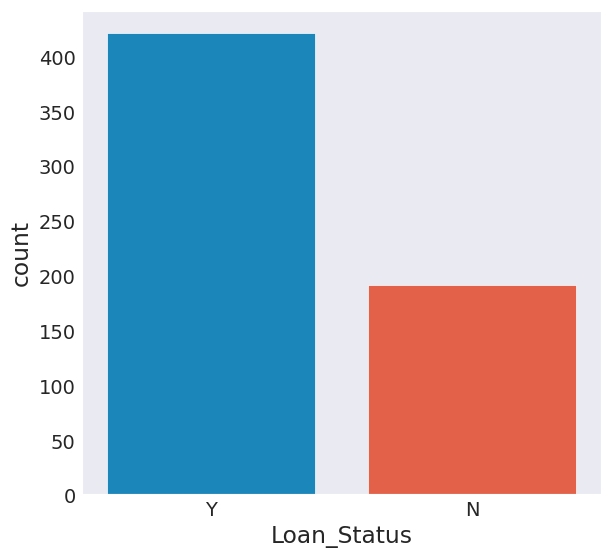

In [13]:
#Those Eligible to collect Loan
plt.figure(figsize=(6,6))
sns.countplot(x ='Loan_Status',data = df)
plt.show()

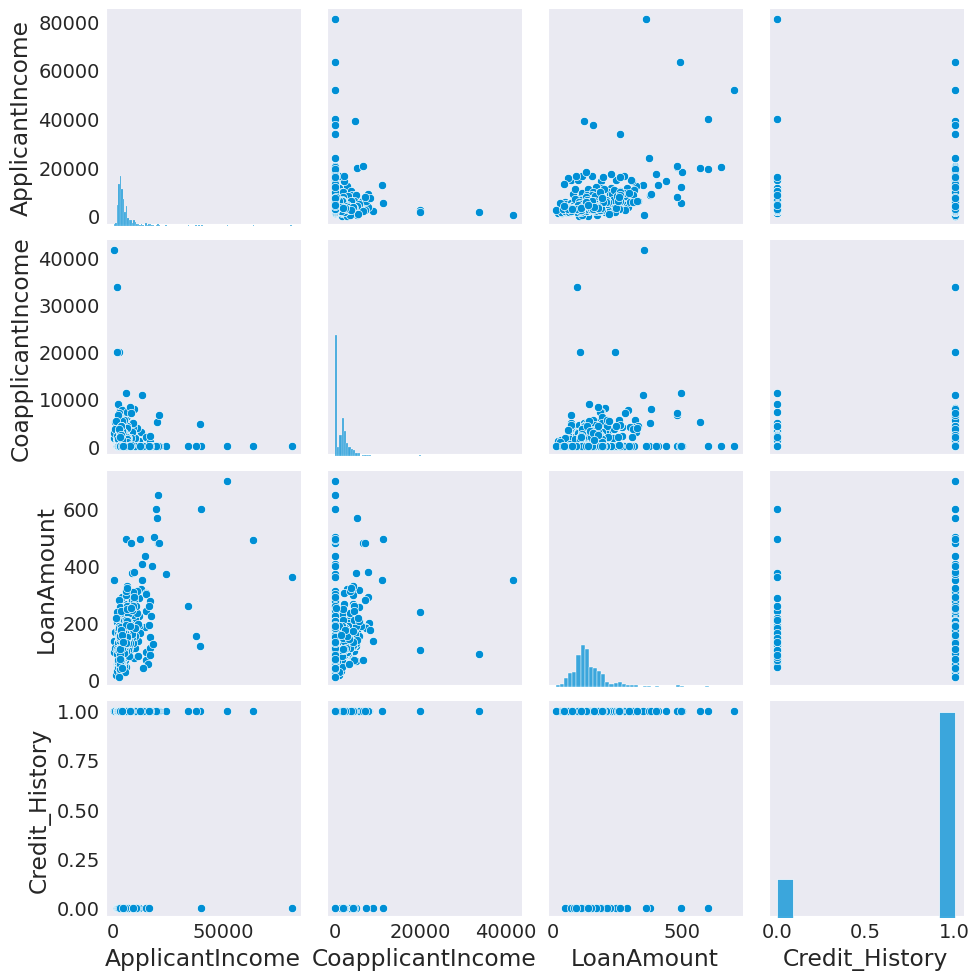

In [14]:
sns.pairplot(df[["ApplicantIncome", "CoapplicantIncome","LoanAmount", "Credit_History"]])
plt.show()

<Axes: xlabel='Loan_Amount_Term'>

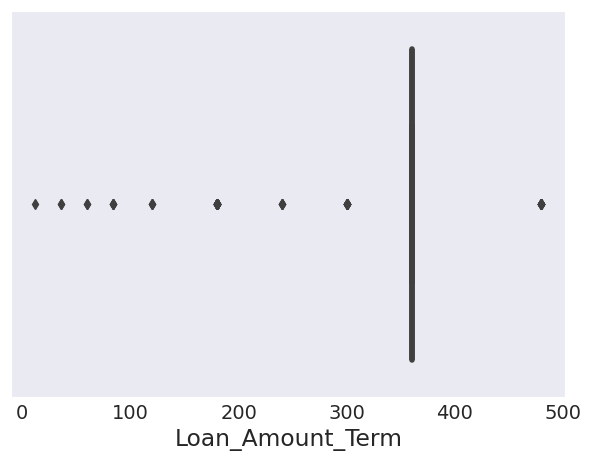

In [15]:
sns.boxplot(x=df['Loan_Amount_Term'])

#### We can see the Loan_Amount_Term has outliers(data points that significantly deviate from the rest of the data in a dataset), which shouldnt be surprising as the data contains many missing values.

In [16]:
import missingno as msmo

<Axes: >

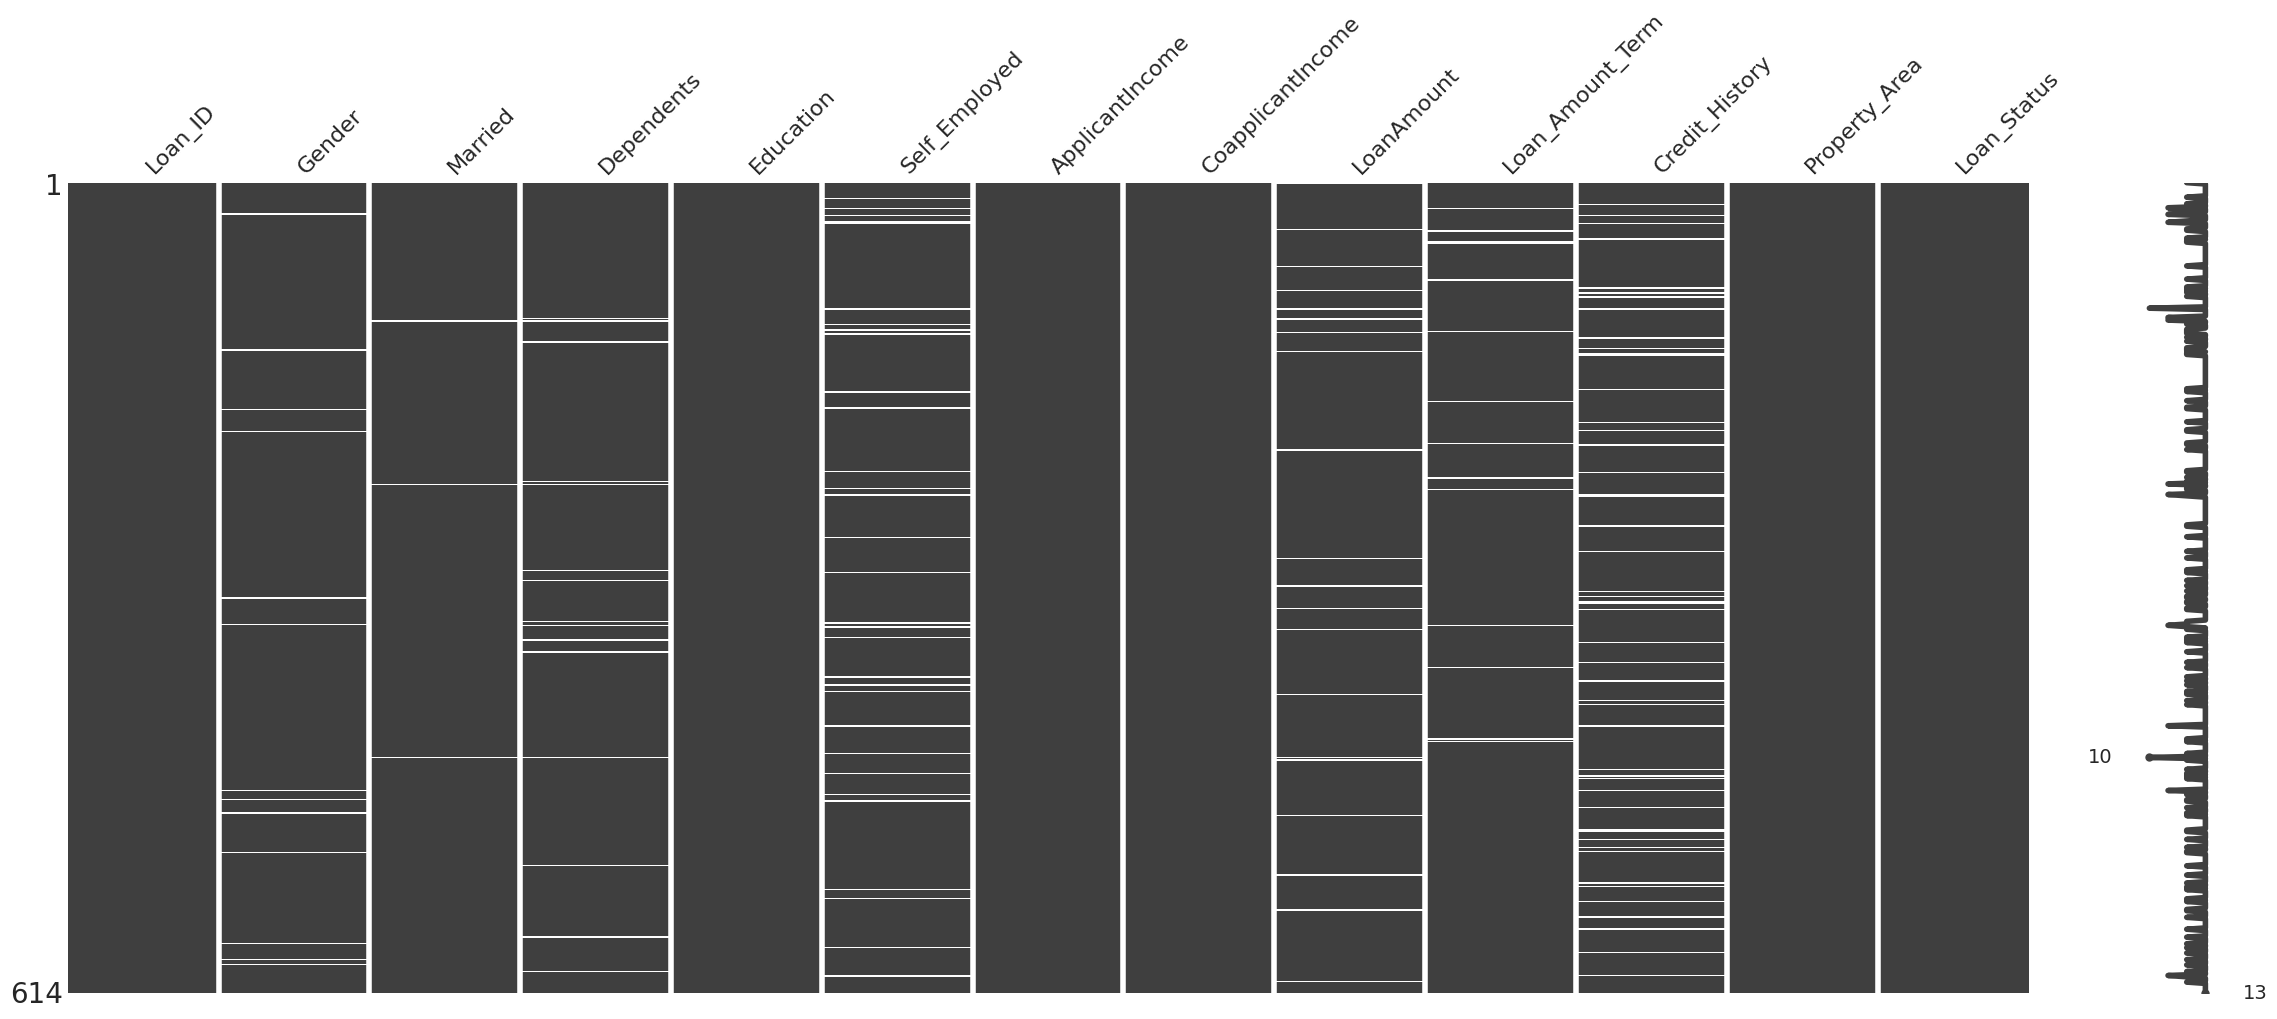

In [17]:
#Matrix to view missing values
msmo.matrix(df)

<Axes: >

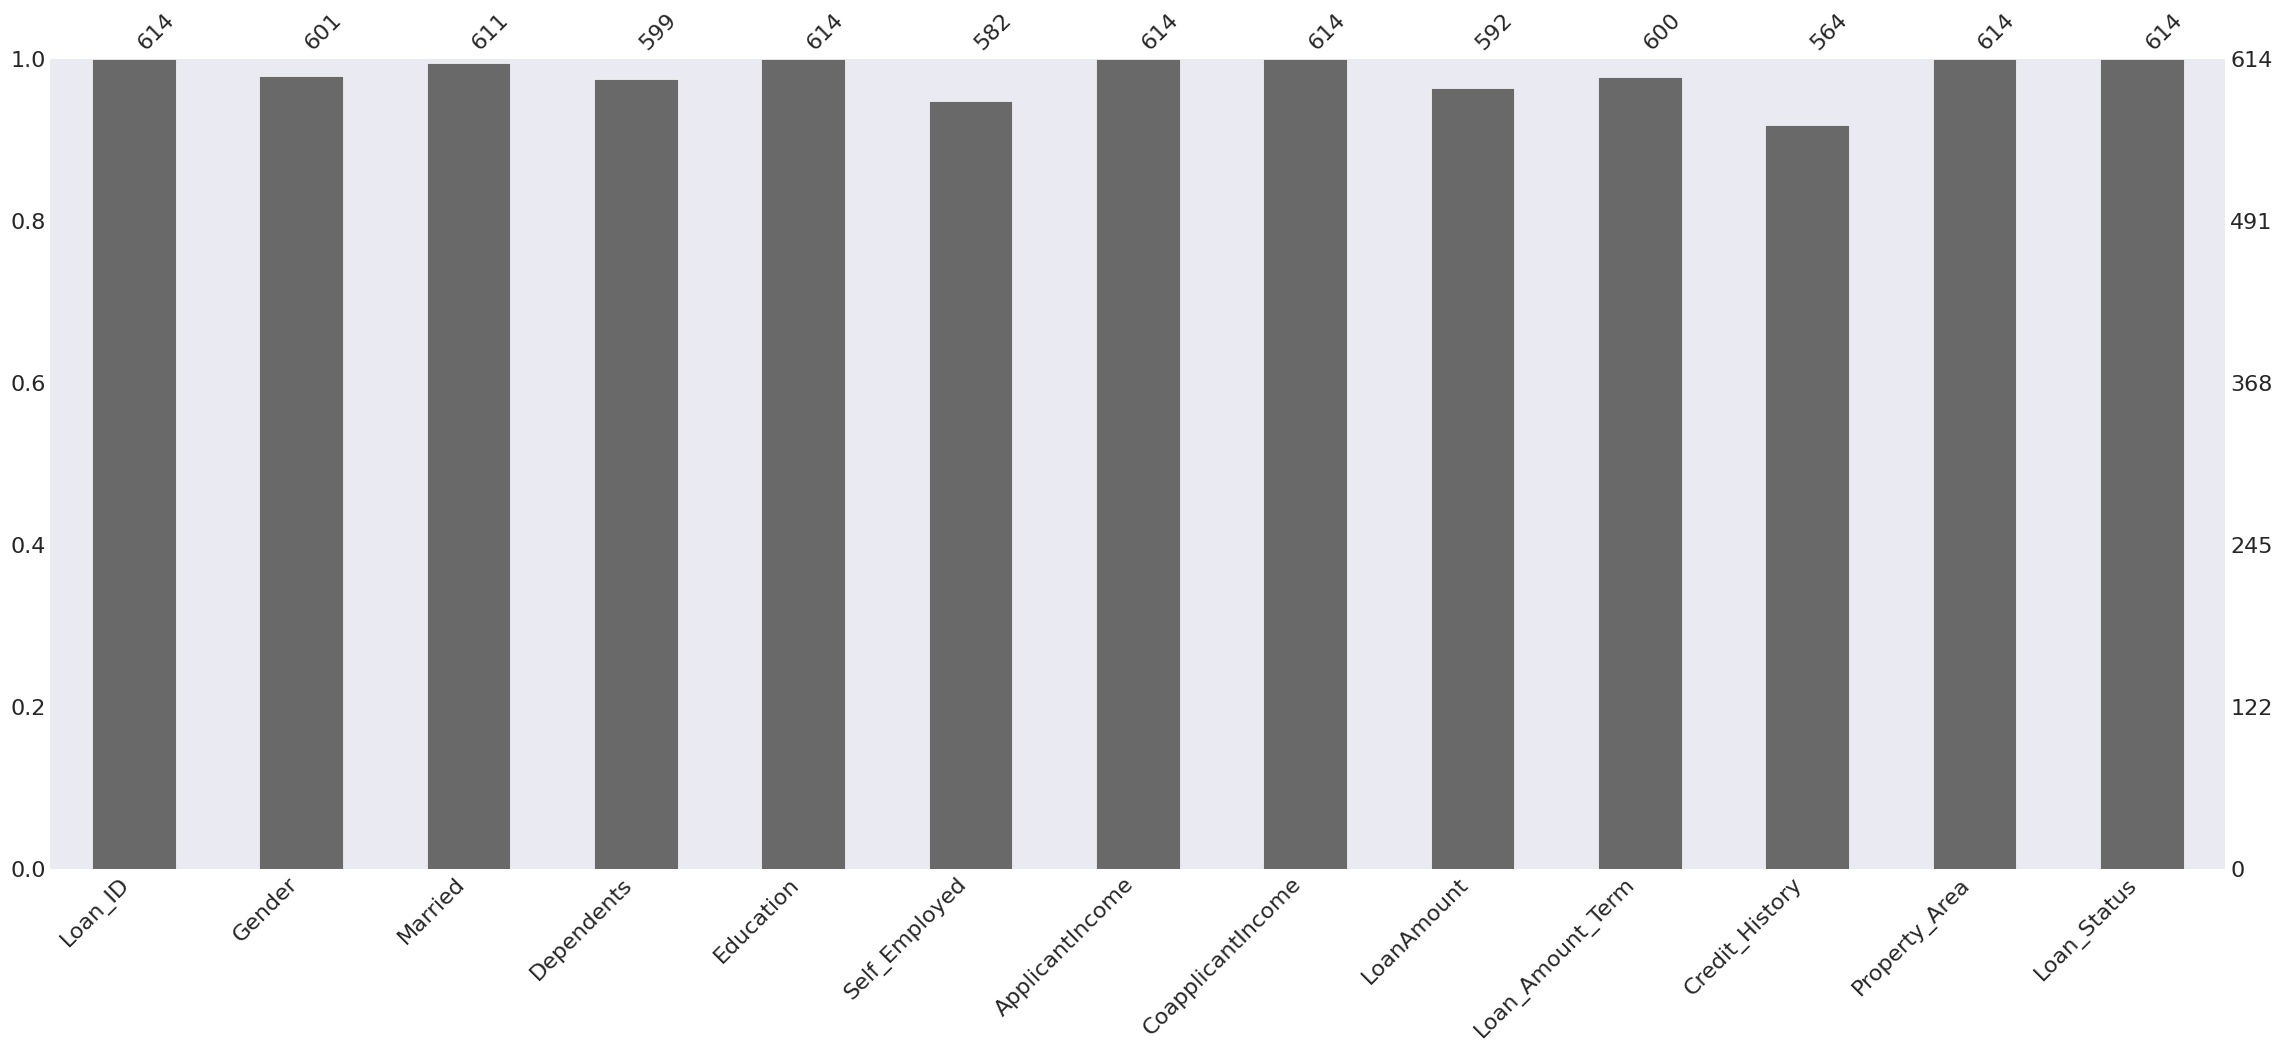

In [18]:
#Non-Data scientists should understand this better
msmo.bar(df)

#### The above data needs to be imputed to remove inconsistensis. But first, lets convert the characters to figures to make working on data easier

In [19]:
df.Loan_Status = df.Loan_Status.replace({'Y': 1, 'N':0})
df.Gender = df.Gender.replace({'Male': 1, 'Female':0})
df.Married = df.Married.replace({'No':0, 'Yes':1})
df.Self_Employed = df.Self_Employed.replace({'No':0, 'Yes':1})

In [20]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [21]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace = True)
df['Married'].fillna(df['Married'].mode(),inplace = True)
df['Credit_History'].fillna(df['Credit_History'].mean(),inplace = True)
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace = True)

In [22]:
from sklearn.preprocessing import LabelEncoder
feature_col = ['Property_Area','Education','ApplicantIncome', 'Dependents']
encoder = LabelEncoder()
for col in feature_col:
    df[col] = encoder.fit_transform(df[col])

In [23]:
df.tail(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
594,LP002938,1.0,1.0,0,0,1.0,481,0.0,260.000000,360.0,1.000000,2,1
595,LP002940,1.0,0.0,0,1,0.0,248,0.0,110.000000,360.0,1.000000,0,1
596,LP002941,1.0,1.0,2,1,1.0,398,1000.0,187.000000,360.0,1.000000,0,0
597,LP002943,1.0,0.0,4,0,0.0,137,0.0,88.000000,360.0,0.000000,1,0
598,LP002945,1.0,1.0,0,0,1.0,453,0.0,180.000000,360.0,1.000000,0,1
599,LP002948,1.0,1.0,2,0,0.0,369,0.0,192.000000,360.0,1.000000,2,1
600,LP002949,0.0,0.0,3,0,NaN,2,41667.0,350.000000,180.0,0.842199,2,0
601,LP002950,1.0,1.0,0,1,NaN,123,2792.0,155.000000,360.0,1.000000,0,1
602,LP002953,1.0,1.0,3,0,0.0,365,0.0,128.000000,360.0,1.000000,2,1
603,LP002958,1.0,0.0,0,0,0.0,230,4301.0,172.000000,360.0,1.000000,0,1


### VISUALIZATION

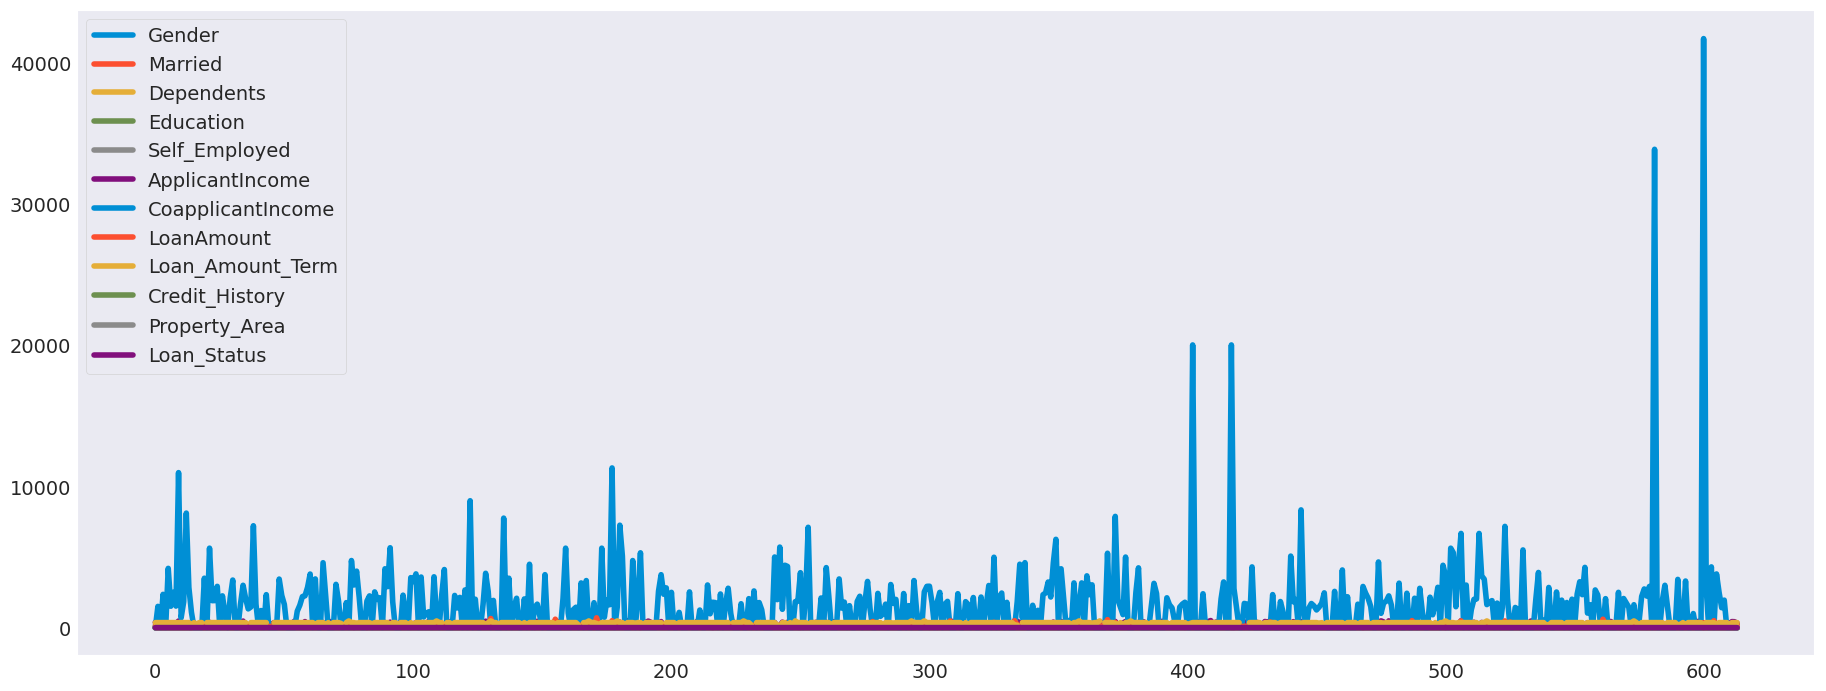

In [24]:
df.plot(figsize=(20,8))
plt.show()

In [25]:
df_column = df[['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']]

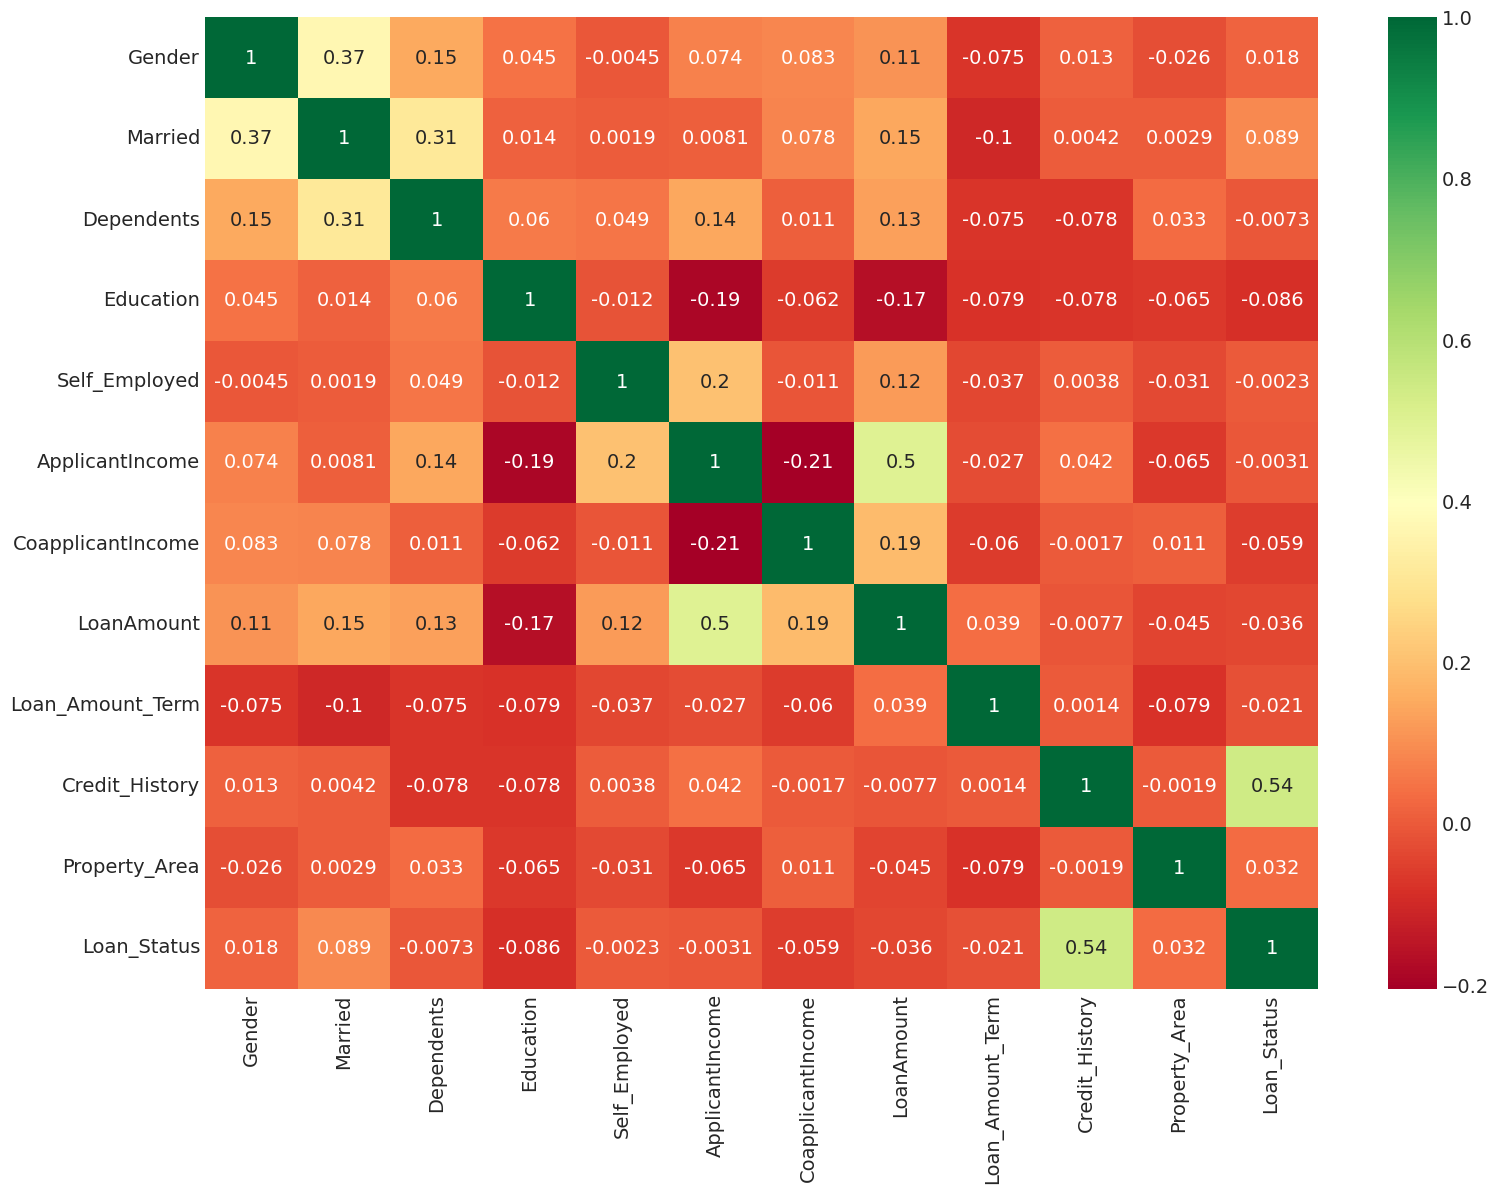

In [26]:
plt.figure(figsize = (16, 12))
sns.heatmap(df_column.corr(),cmap = 'RdYlGn', annot = True, fmt ='.2g')
plt.show()

## MODELING

In [27]:
features = ['Credit_History', 'Education', 'Gender']
X_train =df[features].values
y_train = df['Loan_Status'].values

X_test=df[features].values

In [28]:
# Create and train Random Foest Model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

rf_mse_test = mean_squared_error(y_train, gb_model.predict(X_test))
rf_scores = cross_val_score(rf_model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
score = rf_model.score(X_train, y_train)
print('Accuracy Score:',round(score * 100,2))
print("Random Forest MSE:", -rf_scores.mean())
print("Random Forest MSE (test set):", rf_mse_test)

NameError: name 'gb_model' is not defined

In [ ]:
# Create and train Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

gb_mse_test = mean_squared_error(y_train, gb_model.predict(X_test))
gb_scores = cross_val_score(gb_model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
score = rf_model.score(X_train, y_train)
score = gb_model.score(X_train, y_train)
print('Accuracy Score:',round(score * 100,2))
print("Gradient Boosting MSE:", -gb_scores.mean())
print("Random Forest MSE (test set):", gb_mse_test)

In [ ]:
# Create and train Neural Network model
nn_model = MLPClassifier(random_state=42)
nn_model.fit(X_train, y_train)

nn_mse_test = mean_squared_error(y_train, nn_model.predict(X_test))
nn_scores = cross_val_score(nn_model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
score = gb_model.score(X_train, y_train)
print('Accuracy Score:',round(score * 100,2))
print("Neural Network MSE:", -nn_scores.mean())
print("Random Forest MSE (test set):", gb_mse_test)

In [ ]:
pickle.dump(rf_model,open('model.pkl','wb'))